In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

# Zadanie 6
Prognozowanie ruchu ulicznego. Wykorzystaj dane z czujników ruchu ulicznego do prognozowania przyszłego ruchu na drogach. Zastosuj metodę interpolacji do analizy trendów
w ruchu ulicznym i przewidywania przyszłych wzorców ruchu. Przeprowadź analizę porównawczą różnych metod interpolacji w kontekście prognozowania.

In [39]:
# Wczytanie Danych
df = pd.read_csv('data/traffic.csv')
# Zamiana DateTime na DateTime bez niepotrzebnych godzin
df['DateTime'] = pd.to_datetime(df['DateTime']).dt.date
df = df.drop_duplicates(subset='DateTime', keep='first')
df

,DateTime,Junction,Vehicles,ID
0,2015-11-01,1,15,20151101001
24,2015-11-02,1,14,20151102001
48,2015-11-03,1,21,20151103001
72,2015-11-04,1,18,20151104001
96,2015-11-05,1,19,20151105001
...,...,...,...,...
14472,2017-06-26,1,59,20170626001
14496,2017-06-27,1,92,20170627001
14520,2017-06-28,1,89,20170628001
14544,2017-06-29,1,86,20170629001


Text(0, 0.5, 'Liczba pojazdów')

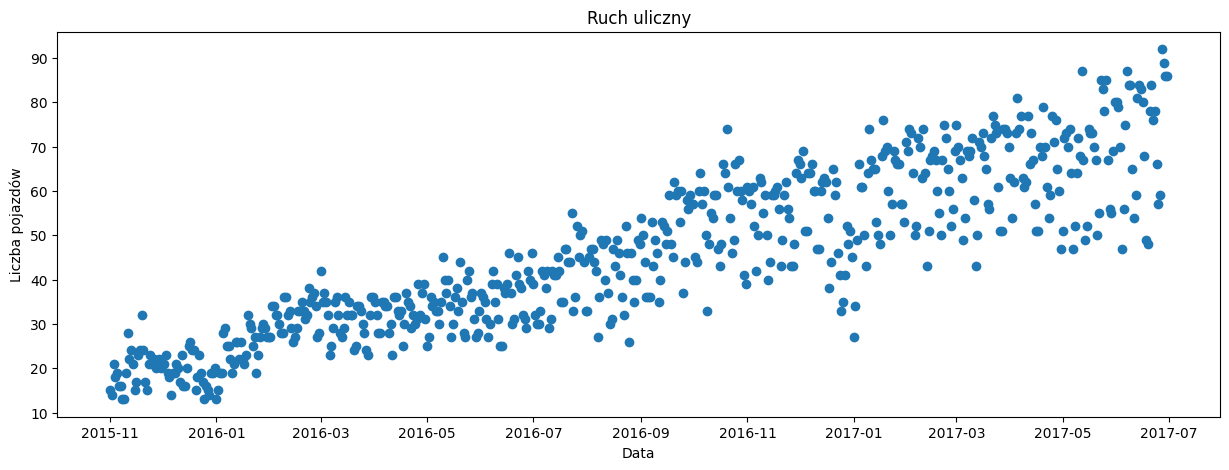

In [40]:
# Wizualizacja danych z tylko jednego czujnika
plt.rcParams['figure.figsize'] = [15, 5]
plt.scatter(df['DateTime'], df['Vehicles'])
plt.title('Ruch uliczny')
plt.xlabel('Data')
plt.ylabel('Liczba pojazdów')

Text(0, 0.5, 'Liczba pojazdów')

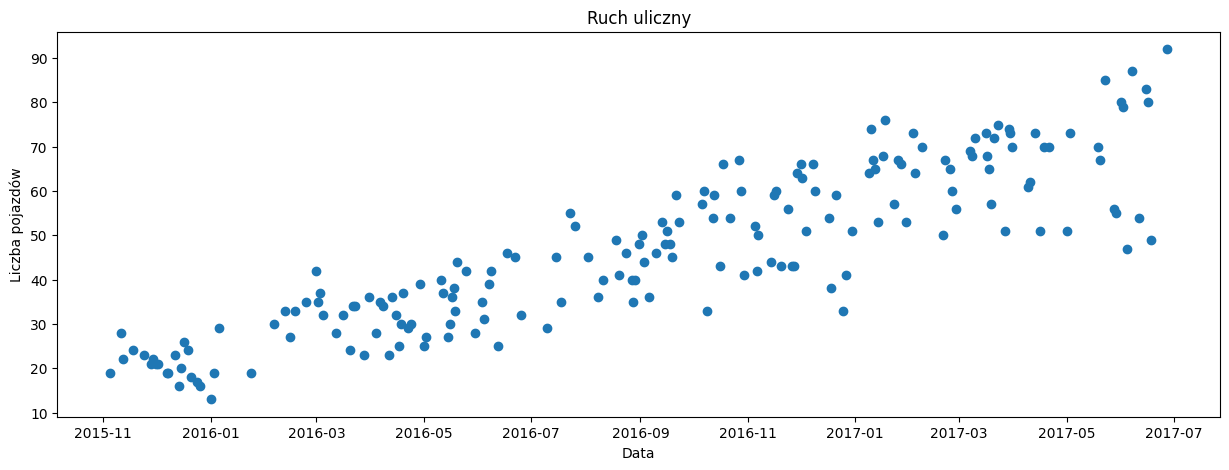

In [41]:
# Dodanie Dziur w danych
temp = df.copy()
temp['Vehicles'] = temp['Vehicles'].mask(np.random.random(df['Vehicles'].shape) < 0.7)
# Wizualizacja
plt.scatter(temp['DateTime'], temp['Vehicles'])
plt.title('Ruch uliczny')
plt.xlabel('Data')
plt.ylabel('Liczba pojazdów')

Text(0, 0.5, 'Liczba pojazdów')

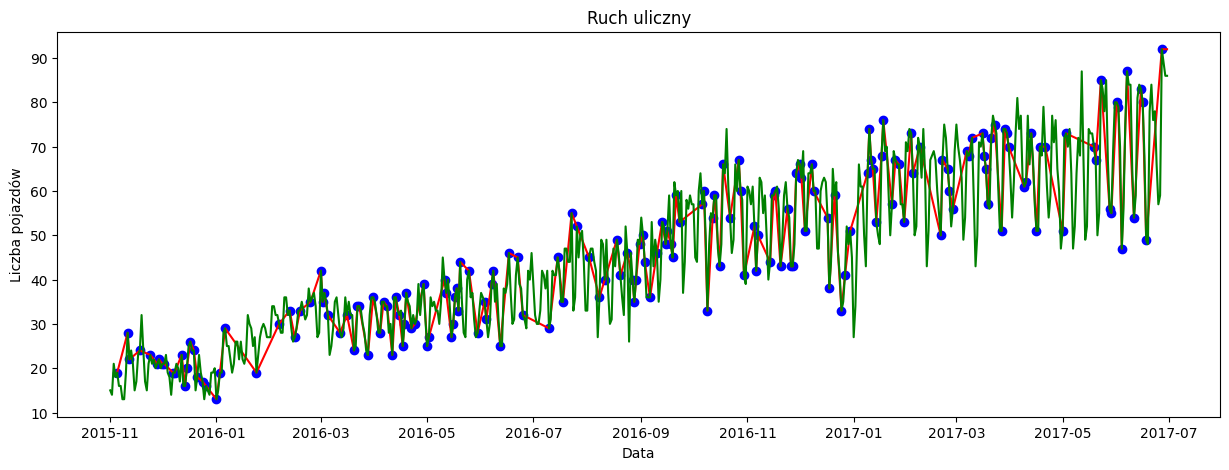

In [42]:
# Interpolacja Liniowa
interpolated = temp['Vehicles'].interpolate(method='linear')
# Wizualizacja
plt.scatter(temp['DateTime'], temp['Vehicles'], c='blue')
plt.plot(temp['DateTime'], interpolated, color='red')
plt.plot(df['DateTime'], df['Vehicles'], color='green')
plt.title('Ruch uliczny')
plt.xlabel('Data')
plt.ylabel('Liczba pojazdów')

In [43]:
# Średni Błąd kwadratowy Interpolacji 
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)
mean_squared_error(df['Vehicles'], interpolated)

48.84385923395651